In [5]:
from imdb import IMDb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
ia = IMDb()

# Searchig for the show in the IMDb database
breakingBad = ia.search_movie("Breaking Bad")

In [7]:
# ID of the show
code = breakingBad[0].movieID

# Get all episodes of the show
breaking_bad = ia.get_movie_episodes(code)

In [8]:
# Breaking Bad - Number of seasons
num_seasons = len(breaking_bad['data']['episodes'])
ratings = []

# Getting IMDb ratings of each episode of the show
for season in range(1, num_seasons + 1):
    # Episodes in a single season
    num_episodes = len(breaking_bad['data']['episodes'][season])
    curr_ratings = []
    # Getting IMDb ratings of each episode of a certain season
    for episode in range(1, num_episodes + 1):
        curr_code = breaking_bad['data']['episodes'][season][episode].movieID
        curr_episode = ia.get_movie(curr_code)
        curr_ratings.append(curr_episode.data['rating'])
    ratings.append(curr_ratings)

In [10]:
# Converting the rating list into a pandas dataframe so that it can be seen properly
df = pd.DataFrame(ratings)
# Transposing the dataframe
df = df.transpose()
# Setting column names for the dataframe
df.columns = ["Season 1", "Season 2", "Season 3", "Season 4", "Season 5"]
# Create new column for episode number
df['Episode'] = range(1, 17)
df = df.set_index('Episode')
df

,Season 1,Season 2,Season 3,Season 4,Season 5
Episode,,,,,
1,9.0,8.7,8.6,9.2,9.3
2,8.7,9.3,8.7,8.3,8.9
3,8.8,8.4,8.5,8.1,8.9
4,8.3,8.3,8.3,8.7,8.9
5,8.4,8.4,8.7,8.7,9.7
6,9.3,8.9,9.3,8.5,9.1
7,8.9,8.7,9.6,8.9,9.6
8,NaN,9.2,8.8,9.3,9.6
9,NaN,9.2,8.5,8.9,9.5


array([list([9.0, 8.7, 8.8, 8.3, 8.4, 9.3, 8.9]),
       list([8.7, 9.3, 8.4, 8.3, 8.4, 8.9, 8.7, 9.2, 9.2, 8.6, 8.9, 9.3, 9.3]),
       list([8.6, 8.7, 8.5, 8.3, 8.7, 9.3, 9.6, 8.8, 8.5, 7.8, 8.5, 9.5, 9.7]),
       list([9.2, 8.3, 8.1, 8.7, 8.7, 8.5, 8.9, 9.3, 8.9, 9.6, 9.7, 9.5, 9.9]),
       list([9.3, 8.9, 8.9, 8.9, 9.7, 9.1, 9.6, 9.6, 9.5, 9.2, 9.6, 9.2, 9.8, 10.0, 9.7, 9.9])],
      dtype=object)

In [55]:
'''
Function to draw the heatmap

Parameters:
-----------
data
    A 2D Numpy array of size(N, M).
    
row_labels
    An array of labels of length N containing row labels.
    
col_labels
    An array of labels of length M containing column labels.
    
ax
    A `matplotlib.axes.Axes` instance to which the heatmap is plotted.
        
cbar_kw
    A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    
cbar_label
    The label for the colorbar.  Optional.
'''
def heatmap(data, row_labels, col_labels, ax, cbar_kw = {}, cbar_label = "", **kwargs):
        
    # Plot the heatmap
    im = ax.imshow(data, **kwargs)
    
    # Create Colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbar_label, rotation=-90, va="bottom")
    
    # Show ticks
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    
    ax.tick_params(axis=u'both', which=u'both',length=0)
    
    # Set tick labels
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    
    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

In [18]:
'''
Function to anotate the heatmap

Parameters:
-----------
im
    The AxesImage to be labeled.
data
    Data used to annotate.
valfmt
    The format of the annotations inside the heatmap.
'''
'''
def annotate_heatmap(im, data, valfmt):
    
    threshold = 
'''

AttributeError: 'list' object has no attribute 'shape'

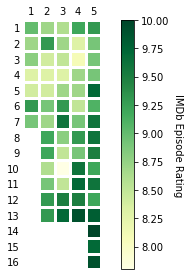

In [57]:
harvest = np.array([[9.0, 8.7, 8.8, 8.3, 8.4, 9.3, 8.9, 0, 0, 0, 0, 0, 0],
                    [8.7, 9.3, 8.4, 8.3, 8.4, 8.9, 8.7, 9.2, 9.2, 8.6, 8.9, 9.3, 9.3]])

fig, ax = plt.subplots()
im, cbar = heatmap(df, range(1,17), range(1,6), ax=ax, cmap="YlGn", cbar_label="IMDb Episode Rating")

fig.tight_layout()
plt.show()

In [44]:
df.shape

(16, 5)